# Exoplanets Final Week 1 Part 1

In [ ]:
# Let's start with importing our packages
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matplotlib settings a little
plt.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

Easlier in the semester, we learned about the **transit** method of discovering exoplanets (planets orbiting stars other than the Sun). In the transit method, we monitor the brightness of a star over time and seach for dips when a planet passes directly between us and the star. As you might imagine, we need a planet's orbit to be perfectly aligned for us to see a transit, which is why we monitor many hundreds of thousands of stars.

The image below provides a graphic explanation for the transit method. As the star passes in front of the star, the brightness of the star drops. We seach for these dips in brightness to find and study planets!

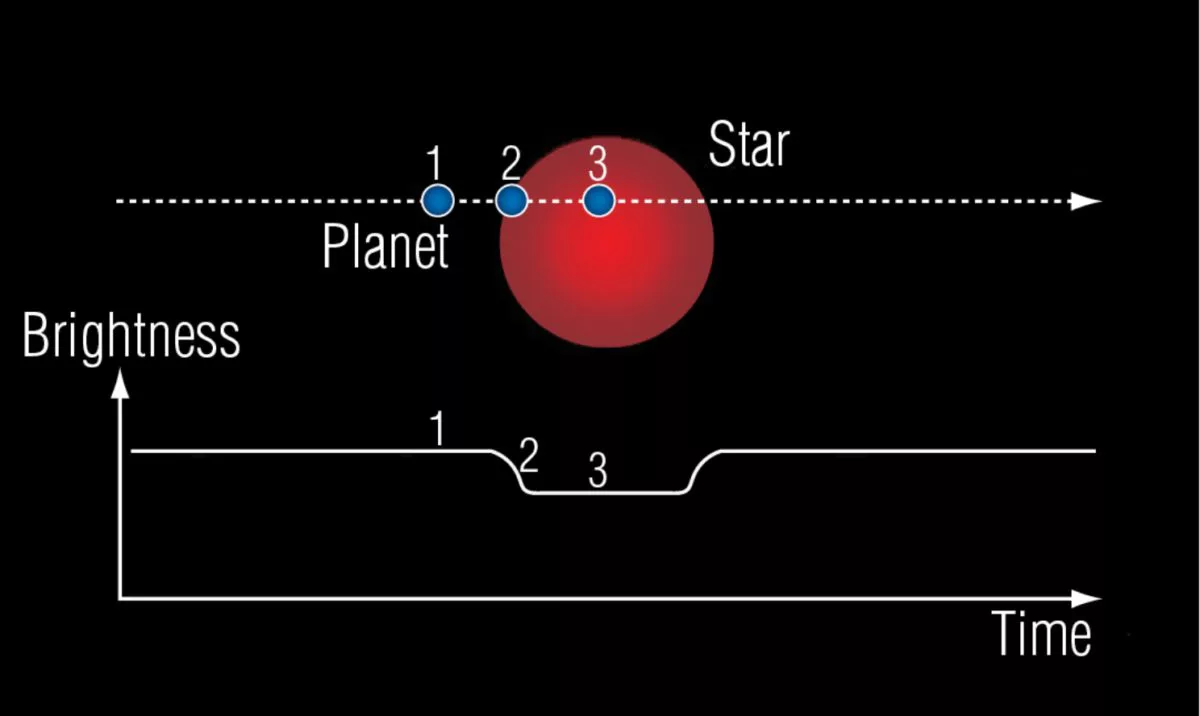

As a class, we looked at JWST obervations of the star Wasp 39 and studied the transit of the planet Wasp 39b.

Run the code below to load in the JWST obervations. JWST took an image of Wasp 39 once every 80s for three hours. Since Wasp 39b has been studied since 2012, the JWST observations were timed with the transit of Wasp 39b. JWST has two key advantages for studying the transit of a planet:


1.   JWST's mirror is huge (6.5m across), so it can make very precise measurements of a star's brightness.
2.   JWST can simultaneously observe the brightness of a star in multiple wavelengths. This allows us to ask how the transit looks at different wavelengths.



In [ ]:
# Let's load in the data
import os
from google.colab import drive

drive.mount('/content/drive/')
os.chdir('/content/drive/Shareddrives/AST207/data')

# load the data
table = pd.read_csv('./Wasp39b.csv')

# list of wavelengths in the table
wavelengths = [
2.53,
2.8,
3.06,
3.34,
3.6,
3.87] # microns (1e-6 meters)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Exercise:** The table we loaded includes the time of each observation (`table["time"]`) and the flux of the star at each time for a given wavelength (`table["flux_2.53"]`, `table["flux_2.8"]`, ...). Last time, we only considered a single wavelength.

Plot `table["time"]` vs. `table["flux_2.53"]` (the flux of Wasp 39 at 2.53 microns). You may want to plot `table["time"] - table["time"].min()` for readability.

Notice the flux starts and ends near one, this is because we are looking at the observed flux divided by the star's typical flux (to make the transit easier to interpret). Let's call this "Relative flux"



In [ ]:
# answer here

**Exercise:** Let's see if the transit depends on the wavelength of light we are observing. On one plot, show `table["time"]` vs. `table["flux_2.53"]` and `table["time"]` vs. `table["flux_3.87"]`. Again you may want to plot `table["time"] - table["time"].min()` for readability. Be sure to label the axes and make a legend saying which color is `flux_2.53` and which is `flux_3.87`.


In [ ]:
# answer here

**Exercise:** Do you see any differences between the transit observed at 2.53 mircons versus 3.87 microns? if so, what are they?

answer here

If a planet is solid rock, its transit shape and depth will be independent of wavelength (assuming the planet isn't emitting any light). Rock stops short and long wavelengths equally well (at least for the ranges we care about).

**But what if a planet has an atmosphere?**

*   We know some molecules are more efficient at blocking light than others. For example, we can see through the air in the room just fine but we can't see through clouds or smoke.
*   We also know the amount of light blocked by a gas depends on the wavelength of light. Remember our discussion of absorption lines: each atom and molecule has specific wavelengths of light that they very efficiently absorb and other wavelengths they ignore.

Let's see if the transit depth of Wasp 39b changes with wavelength. If it does, we discovered an atmosphere over 600 light years away!!


**Exercise:** Write a function to calculate the transit depth $\mathrm{Flux}_\mathrm{in~transit} / \mathrm{Flux}_\mathrm{out~of~transit}$ (called $\delta$). Your function should take in a light curve (`time`, `flux`) and calculate the median flux within a window of time centered at `t0` with a width of `width` and return $\mathrm{Flux}_\mathrm{in~transit} / \mathrm{Flux}_\mathrm{out~of~transit}$ (you can assume $\mathrm{Flux}_\mathrm{out~of~transit}=1$):

`def get_transit_depth(time, flux, t0, width)`.

 Set `t0=0.19` and `width=0.03` to make sure we are calculating the median flux near the center of the transit.

For `table["flux_2.53"]` calculate $\delta$ with your function. To test your function `get_transit_depth(time, flux, t0=0.19, width=0.03)` should return `0.978`.


In [ ]:
# answer here

**Exercise:** Use `get_transit_depth` to calculate $\delta$ for each wavelength in the table (the list of wavelengths is included in the cell where we loaded the data in). Be sure to use the same `t0, width` for each wavelength. Then plot $1-\delta$ vs. wavelength. What do you see? Is the $\delta$ independent of wavelength? At what wavelength does the planet block the most light? at wavelength does it block the least?

To see if your results are reasonable, compare time vs. flux for each wavelength by plotting each lightcurve on the same plot.

In [ ]:
# answer here

**Exercise:** Compare your result to the figure below from [Ahrer et al. 2023](https://arxiv.org/pdf/2211.10489)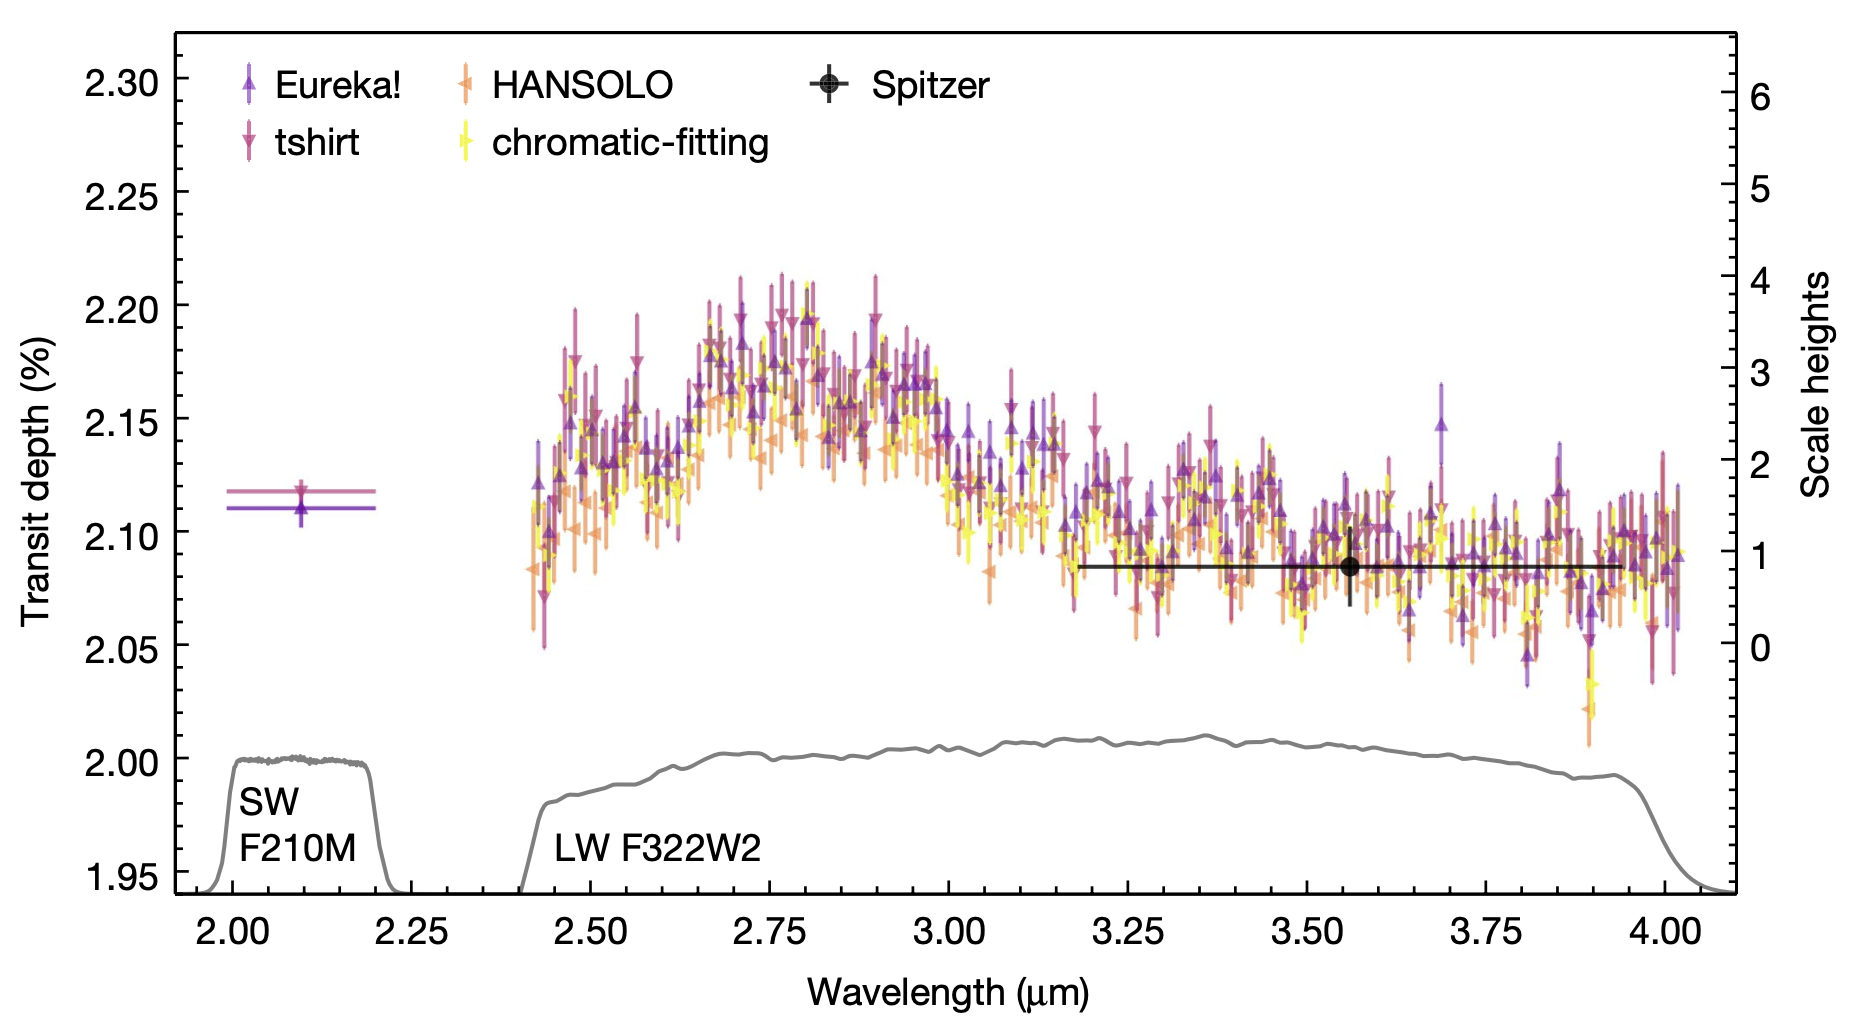

answer here